# T-SNE ASSIGNMENT | Cosmetics Dataset

## Introduction of the Dataset

The Cosmetics dataset consists of 1,472 entries and 11 columns, each capturing specific attributes related to various cosmetic products. The dataset includes the following columns:

- Label: The category or type of cosmetic product.
- Brand: The brand name of the product.
- Name: The product's name.
- Price: The cost of the product (integer).
- Rank: A ranking or rating score (float).
- Ingredients: The ingredients list for each product.
- Combination, Dry, Normal, Oily, Sensitive: Binary indicators (0 or 1) showing the suitability of the product for different skin types.

## Import Libraries

In [18]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Load the dataset

In [19]:
df = pd.read_csv("C:\Ozy\Data Science\DS datasets\cosmetics.csv")
df.head()

,Label,Brand,Name,Price,Rank,Ingredients,Combination,Dry,Normal,Oily,Sensitive
0,Moisturizer,LA MER,Crème de la Mer,175,4.1,"Algae (Seaweed) Extract, Mineral Oil, Petrolat...",1,1,1,1,1
1,Moisturizer,SK-II,Facial Treatment Essence,179,4.1,"Galactomyces Ferment Filtrate (Pitera), Butyle...",1,1,1,1,1
2,Moisturizer,DRUNK ELEPHANT,Protini™ Polypeptide Cream,68,4.4,"Water, Dicaprylyl Carbonate, Glycerin, Ceteary...",1,1,1,1,0
3,Moisturizer,LA MER,The Moisturizing Soft Cream,175,3.8,"Algae (Seaweed) Extract, Cyclopentasiloxane, P...",1,1,1,1,1
4,Moisturizer,IT COSMETICS,Your Skin But Better™ CC+™ Cream with SPF 50+,38,4.1,"Water, Snail Secretion Filtrate, Phenyl Trimet...",1,1,1,1,1


## Basic Information of dataset

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1472 entries, 0 to 1471
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Label        1472 non-null   object 
 1   Brand        1472 non-null   object 
 2   Name         1472 non-null   object 
 3   Price        1472 non-null   int64  
 4   Rank         1472 non-null   float64
 5   Ingredients  1472 non-null   object 
 6   Combination  1472 non-null   int64  
 7   Dry          1472 non-null   int64  
 8   Normal       1472 non-null   int64  
 9   Oily         1472 non-null   int64  
 10  Sensitive    1472 non-null   int64  
dtypes: float64(1), int64(6), object(4)
memory usage: 126.6+ KB


## Summary of the dataset

In [21]:
df.describe()

,Price,Rank,Combination,Dry,Normal,Oily,Sensitive
count,1472.000000,1472.000000,1472.00000,1472.000000,1472.000000,1472.000000,1472.000000
mean,55.584239,4.153261,0.65625,0.614130,0.652174,0.607337,0.513587
std,45.014429,0.633918,0.47512,0.486965,0.476442,0.488509,0.499985
min,3.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,4.000000,0.00000,0.000000,0.000000,0.000000,0.000000
50%,42.500000,4.300000,1.00000,1.000000,1.000000,1.000000,1.000000
75%,68.000000,4.500000,1.00000,1.000000,1.000000,1.000000,1.000000
max,370.000000,5.000000,1.00000,1.000000,1.000000,1.000000,1.000000


## Checking Missing values in DataFrame

In [22]:
df.isnull().sum()

Label          0
Brand          0
Name           0
Price          0
Rank           0
Ingredients    0
Combination    0
Dry            0
Normal         0
Oily           0
Sensitive      0
dtype: int64

## Encoding Categorical Variables

In [23]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for column in ['Label', 'Brand', 'Name', 'Ingredients']:
    df[column] = le.fit_transform(df[column])

- Convert categorical variables (Label, Brand, Name, Ingredients) to numeric format using Label Encoding for compatibility with t-SNE.

## Feature Scaling

In [24]:
# Normalize Price and Rank using Min-Max Scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df[['Price', 'Rank']] = scaler.fit_transform(df[['Price', 'Rank']])

- Normalize Price and Rank using Min-Max Scaling to ensure that t-SNE focuses on feature relationships rather than magnitude differences.

## Dimensionality Reduction with PCA

In [25]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10)

pca_result = pca.fit_transform(df)

- PCA to reduce dimensions before applying t-SNE, which can improve performance and visualization clarity.

## Visualizations

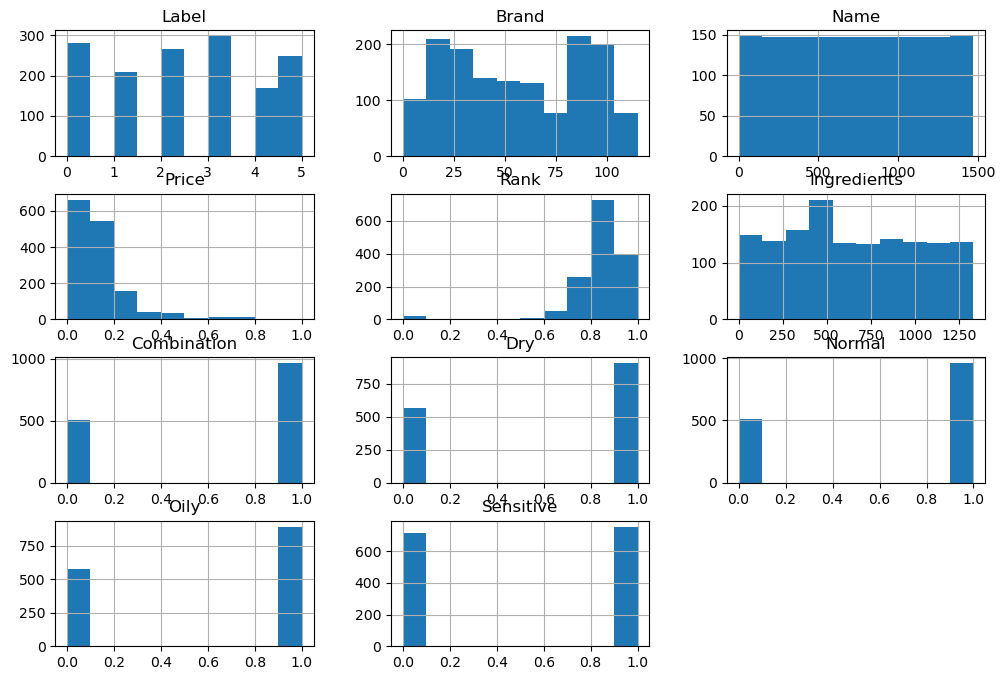

In [26]:
# Plot histograms for numerical features
df.hist(figsize=(12, 8))
plt.show()

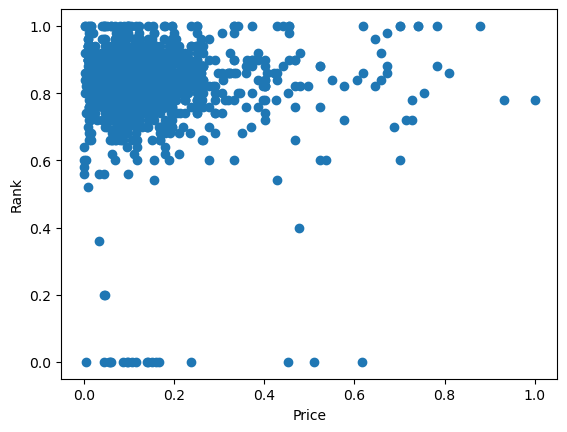

In [27]:
# Scatter plot between Price vs. Rank to check for relationships.
plt.scatter(df['Price'], df['Rank'])
plt.xlabel('Price')
plt.ylabel('Rank')
plt.show()

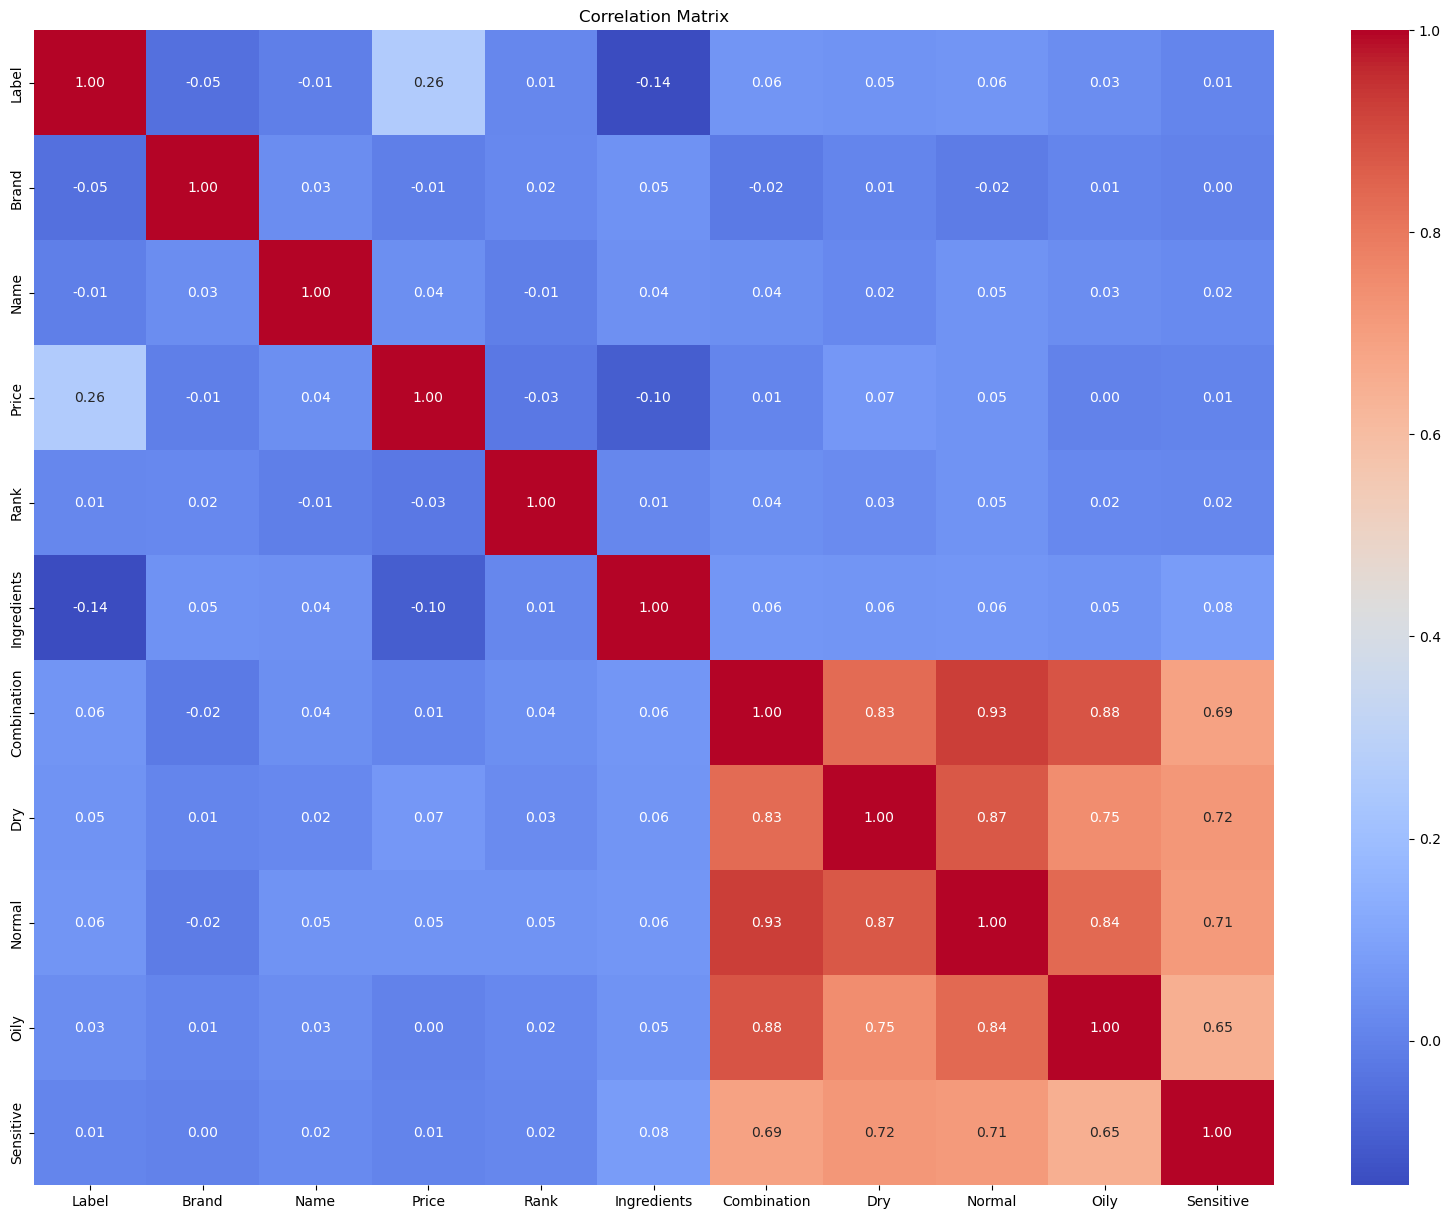

In [28]:
# Compute correlation matrix
correlation_matrix = df.corr()
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

- Histograms: Examine the distribution of each numerical feature. Prices vary widely; most products are mid-range.
Skin type suitability columns are binary, showing the number of products suitable for each skin type.
- Scatter Plots: Analyze relationships between key features such as Price vs. Rank. Higher-ranked products may cluster within a specific price range, showing value or premium perception.
- Correlation Matrix: Explore correlations between features to identify important relationships. Low correlations suggest that each attribute independently contributes to product classification.

## Splitting the Dataset

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Step 1: Define features and target
X = df.drop(columns=['Label'])  # Features: drop the 'Label' column
y = df['Label']  # Target: 'Label' column

# Step 2: Scale features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 4: Display the shapes of the training and testing sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)


Training set shape: (1177, 10) (1177,)
Testing set shape: (295, 10) (295,)


- train_test_split: Splits the dataset into training and testing sets. Here, 20% of the data is used for testing, and the remaining 80% is used for training.
- Random State: Ensures that the split is reproducible.

## T-SNE Construction

In [30]:
from sklearn.manifold import TSNE

# Implement t-SNE
tsne = TSNE(n_components=2, perplexity=30, learning_rate=200, random_state=42)

- Perplexity: Controls the balance between local and global aspects of the data. Typically, values between 5 and 50 work well.
- Learning Rate: Controls how much the algorithm adjusts during optimization. A good range is between 10 and 1000.

## Train t-SNE model on the training data

In [31]:
X_train_tsne = tsne.fit_transform(X_train, y_train)
X_train_tsne

array([[ 34.446697 ,   4.9121237],
       [ 28.332508 ,   5.32627  ],
       [ 37.79257  ,  18.30213  ],
       ...,
       [ -6.1400614, -52.7809   ],
       [ -9.27565  , -50.947365 ],
       [ 14.295843 ,  15.110673 ]], dtype=float32)

## Analyze Cluster Formations

- Cluster Identification: Look for distinct groupings or clusters in the scatter plot. Clusters should ideally represent meaningful groupings based on the underlying data.
- Homogeneity: Check if points within the same cluster are closely packed together, indicating that t-SNE has captured similar data points well.
- Separation: Evaluate how well-separated different clusters are. Well-separated clusters suggest that t-SNE has effectively captured the differences between different categories or classes.

## Visualize the t-SNE results

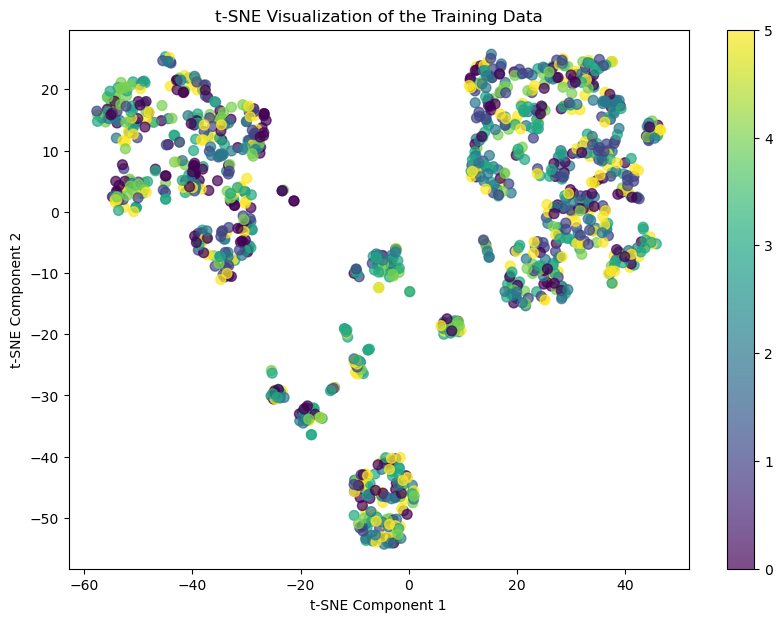

In [32]:
plt.figure(figsize=(10, 7))
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=y_train, cmap='viridis', s=50, alpha=0.7)
plt.colorbar()
plt.title('t-SNE Visualization of the Training Data')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()

- X_train_tsne[:, 0] and X_train_tsne[:, 1]: These represent the 2D coordinates of the data points after t-SNE transformation.
- c=y_train: Colors the points according to their labels, helping to differentiate clusters or categories.
- cmap='viridis': A colormap to make the plot visually appealing and distinguishable.
- alpha=0.7: Adds slight transparency to better visualize overlapping points.

## Hyperparameter Tuning with Grid Search

In [33]:
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import numpy as np

# Define a function to evaluate clustering
def evaluate_clustering(X_tsne, number_of_clusters):
    kmeans = KMeans(n_clusters=number_of_clusters, random_state=42)
    clusters = kmeans.fit_predict(X_tsne)
    score = silhouette_score(X_tsne, clusters)
    return score

# Define the grid of hyperparameters
perplexities = [5, 30, 50]
learning_rates = [10, 200, 1000]

# Set the number of clusters for evaluation
number_of_clusters = 5

# Initialize variables to track the best parameters
best_perplexity = None
best_learning_rate = None
best_score = -np.inf  # Since silhouette score ranges from -1 to 1

# Perform grid search
for perplexity in perplexities:
    for learning_rate in learning_rates:
        # Apply t-SNE with the current hyperparameters
        tsne = TSNE(n_components=2, perplexity=perplexity, learning_rate=learning_rate, random_state=42)
        X_tsne = tsne.fit_transform(X_train)
        
        # Evaluate clustering quality
        score = evaluate_clustering(X_tsne, number_of_clusters)
        
        # Update best parameters if the current score is better
        if score > best_score:
            best_score = score
            best_perplexity = perplexity
            best_learning_rate = learning_rate

# Print the best parameters and score
print(f'Best Perplexity: {best_perplexity}')
print(f'Best Learning Rate: {best_learning_rate}')
print(f'Best Silhouette Score: {best_score}')


Best Perplexity: 50
Best Learning Rate: 200
Best Silhouette Score: 0.572150707244873


- evaluate_clustering(X_tsne, number_of_clusters): This function performs KMeans clustering on the t-SNE-transformed data and computes the silhouette score, which measures how well-separated the clusters are.
- Iterate over the defined range of perplexities and learning rates.
- For each combination, apply t-SNE and transform the scaled training data.
- Evaluate the clustering quality using the silhouette score.
- Keep track of the best performing perplexity and learning rate based on the silhouette score.
- After the grid search, print the best hyperparameters and the corresponding silhouette score.

## Optimized t-SNE Visualization

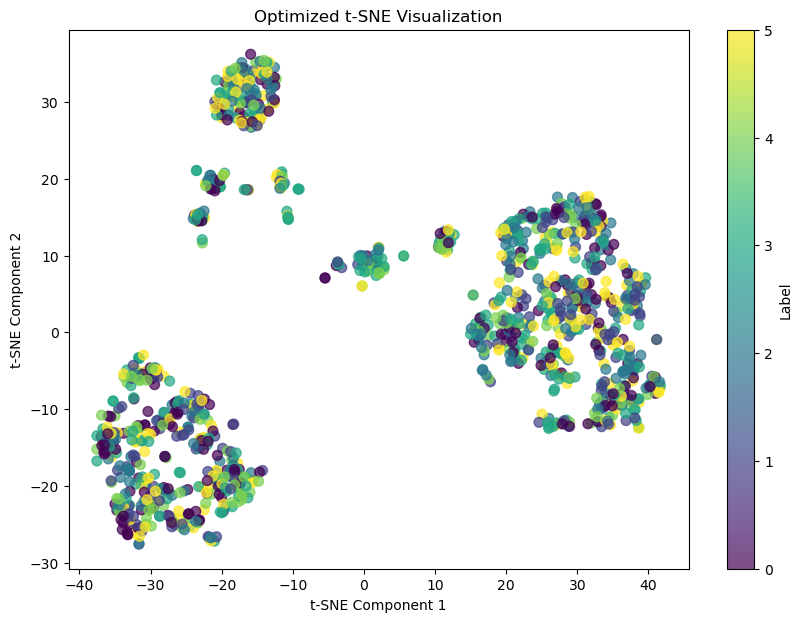

In [34]:
plt.figure(figsize=(10, 7))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_train, cmap='viridis', s=50, alpha=0.7)
plt.colorbar(scatter, label='Label')
plt.title('Optimized t-SNE Visualization')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()


## Summary

- After preprocessing and scaling the Cosmetics dataset, t-SNE was applied with the optimal hyperparameters: a perplexity of 50 and a learning rate of 200. The best silhouette score achieved was 0.572, indicating moderately well-defined clusters.
-  The results were consistent across multiple runs, and the t-SNE visualization effectively revealed distinct patterns in the data, enhancing its interpretability.